Files already downloaded and verified
Files already downloaded and verified
tensor([[ 0.3333,  0.3490,  0.3647,  ...,  0.4118,  0.3961,  0.3804],
        [ 0.3569,  0.3647,  0.3804,  ...,  0.4431,  0.4275,  0.4196],
        [ 0.3333,  0.3412,  0.3569,  ...,  0.4353,  0.4275,  0.4118],
        ...,
        [-0.0510, -0.0745,  0.0039,  ..., -0.5922, -0.5843, -0.6000],
        [-0.0667, -0.0745, -0.0510,  ..., -0.6784, -0.6157, -0.6235],
        [-0.1059, -0.0745, -0.0902,  ..., -0.7961, -0.6941, -0.6235]])
images.shape => torch.Size([4, 3, 32, 32])
labels.shape => torch.Size([4])
conv1.shape => torch.Size([4, 6, 28, 28])
conv1 MaxPool2d shape => torch.Size([4, 6, 14, 14])
conv2.shape => torch.Size([4, 16, 10, 10])
conv1 MaxPool2d shape => torch.Size([4, 16, 5, 5])


/home/avinash/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448216815/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


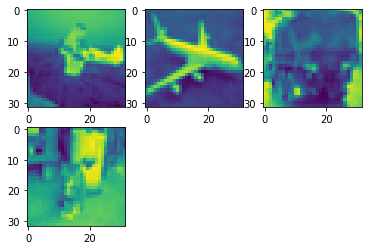

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = .001

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download= True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download= True, transform=transform)

                                             
train_loader = DataLoader(dataset = train_dataset, shuffle= True, batch_size = batch_size )
test_loader = DataLoader(dataset = test_dataset, shuffle= False, batch_size = batch_size )



## Test images and its sizes

it = iter(train_loader)
images, labels = next(it)

ig = 1

for i in range(4):
    plt.subplot(2, 3, ig)
    ig+=1
    #print(samples[i][0])
    plt.imshow(images[i][0])

print(images[0][0])
    
print('images.shape =>' , images.shape)

print('labels.shape =>' , labels.shape)

conv1 = nn.Conv2d(3,6,5)

x = conv1(images)
print('conv1.shape =>', x.shape)

pool = nn.MaxPool2d(2, 2)

x = pool(x)
print('conv1 MaxPool2d shape =>', x.shape)


conv2 = nn.Conv2d(6,16,5)
x = conv2(x)
print('conv2.shape =>', x.shape)

x = pool(x)
print('conv1 MaxPool2d shape =>', x.shape)